## Group work on encoding

In [69]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [ ]:
# Reading the csv file
df_st = pd.read_csv('./StudentsPerformance.csv')
df_st.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
# Converting the categorical variables using one hot encoding(binary)
df_dummies = pd.get_dummies(df_st, columns=['gender', 'race/ethnicity','parental level of education', 'lunch','test preparation course'])
df_dummies.head()

,math score,reading score,writing score,gender_female,gender_male,race/ethnicity_group A,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1
1,69,90,88,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0
2,90,95,93,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1
4,76,78,75,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1


In [ ]:
# Checking for null values
df_dummies.isna().sum()

math score                                        0
reading score                                     0
writing score                                     0
gender_female                                     0
gender_male                                       0
race/ethnicity_group A                            0
race/ethnicity_group B                            0
race/ethnicity_group C                            0
race/ethnicity_group D                            0
race/ethnicity_group E                            0
parental level of education_associate's degree    0
parental level of education_bachelor's degree     0
parental level of education_high school           0
parental level of education_master's degree       0
parental level of education_some college          0
parental level of education_some high school      0
lunch_free/reduced                                0
lunch_standard                                    0
test preparation course_completed                 0
test prepara

In [73]:
df_dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                          Non-Null Count  Dtype
---  ------                                          --------------  -----
 0   math score                                      1000 non-null   int64
 1   reading score                                   1000 non-null   int64
 2   writing score                                   1000 non-null   int64
 3   gender_female                                   1000 non-null   uint8
 4   gender_male                                     1000 non-null   uint8
 5   race/ethnicity_group A                          1000 non-null   uint8
 6   race/ethnicity_group B                          1000 non-null   uint8
 7   race/ethnicity_group C                          1000 non-null   uint8
 8   race/ethnicity_group D                          1000 non-null   uint8
 9   race/ethnicity_group E                          1000 non-null   

In [74]:
df_st.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [75]:
# We need to drop one to create a baseline to act as reference and so that the model can learn something new 
# When dropping use the original data set instead of the encoded one
df_st = pd.get_dummies(df_st, columns=['gender', 'race/ethnicity','parental level of education', 'lunch','test preparation course'], drop_first=True)
df_st

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,0,0,0,1,0,0,0,0,1,0,1,0


In [ ]:
# Feature engineering a new column to get out target
df_st['average score']= (df_st['math score'] + df_st['reading score'] + df_st['writing score']) / 3
df_st.head()

,math score,reading score,writing score,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none,average score
0,72,72,74,0,1,0,0,0,1,0,0,0,0,1,1,72.666667
1,69,90,88,0,0,1,0,0,0,0,0,1,0,1,0,82.333333
2,90,95,93,0,1,0,0,0,0,0,1,0,0,1,1,92.666667
3,47,57,44,1,0,0,0,0,0,0,0,0,0,0,1,49.333333
4,76,78,75,1,0,1,0,0,0,0,0,1,0,1,1,76.333333


In [77]:
df_st.columns

Index(['math score', 'reading score', 'writing score', 'gender_male',
       'race/ethnicity_group B', 'race/ethnicity_group C',
       'race/ethnicity_group D', 'race/ethnicity_group E',
       'parental level of education_bachelor's degree',
       'parental level of education_high school',
       'parental level of education_master's degree',
       'parental level of education_some college',
       'parental level of education_some high school', 'lunch_standard',
       'test preparation course_none', 'average score'],
      dtype='object')

In [ ]:
# stripping white spaces
df_st.columns = df_st.columns.str.strip()


In [ ]:
# Removing apostrophes and replacing with underscore
df_st.columns = df_st.columns.str.replace("'", "", regex=False).str.replace(" ", "_")
df_st.columns


Index(['math_score', 'reading_score', 'writing_score', 'gender_male',
       'race/ethnicity_group_B', 'race/ethnicity_group_C',
       'race/ethnicity_group_D', 'race/ethnicity_group_E',
       'parental_level_of_education_bachelors_degree',
       'parental_level_of_education_high_school',
       'parental_level_of_education_masters_degree',
       'parental_level_of_education_some_college',
       'parental_level_of_education_some_high_school', 'lunch_standard',
       'test_preparation_course_none', 'average_score'],
      dtype='object')

In [81]:
# Generating a model
y = df_st['average_score']    #target
x = df_st[[ 'gender_male',
       'race/ethnicity_group_B', 'race/ethnicity_group_C',
       'race/ethnicity_group_D', 'race/ethnicity_group_E',
       'parental_level_of_education_bachelors_degree',
       'parental_level_of_education_high_school',
       'parental_level_of_education_masters_degree',
       'parental_level_of_education_some_college',
       'parental_level_of_education_some_high_school', 'lunch_standard',
       'test_preparation_course_none']]  #features/predictors
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_score   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     26.30
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           7.55e-52
Time:                        15:56:01   Log-Likelihood:                -3937.0
No. Observations:                1000   AIC:                             7900.
Df Residuals:                     987   BIC:                             7964.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           66.9408      1.775     37.714      0.000      63.458      70.424
gender_male                                     -3.7242      0.795     -4.682      0.000      -5.285      -2.163
race/ethnicity_group_B                           1.5290      1.612      0.949      0.343      -1.634       4.691
race/ethnicity_group_C                           2.3855      1.509      1.581      0.114      -0.576       5.347
race/ethnicity_group_D                           5.1258      1.540      3.329      0.001       2.104       8.147
race/ethnicity_group_E                           6.9285      1.708      4.056      0.000       3.577      10.280
parental_level_of_education_bachelors_degree     2.5356      1.424      1.781      0.075      -0.259       5.330
parental_level_of_education_high_school         -5.1725      1.230     -4.206      0.000      -7.586      -2.759
parental_level_of_education_masters_degree       4.0922      1.838      2.227      0.026       0.486       7.698
parental_level_of_education_some_college        -0.9275      1.182     -0.785      0.433      -3.248       1.393
parental_level_of_education_some_high_school    -4.5400      1.264     -3.592      0.000      -7.020      -2.060
lunch_standard                                   8.7751      0.827     10.605      0.000       7.151      10.399
test_preparation_course_none                    -7.6386      0.830     -9.201      0.000      -9.268      -6.009
==============================================================================
Omnibus:                       12.572   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.915
Skew:                          -0.274   Prob(JB):                      0.00157
Kurtosis:                       2.897   Cond. No.                         12.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Generating alternative models to test the model efficiency

In [ ]:

y = df_st['average_score']    #target
x1 = df_st[[ 'gender_male',
       'race/ethnicity_group_B', 'race/ethnicity_group_C',
       'race/ethnicity_group_D', 'race/ethnicity_group_E',
       'parental_level_of_education_bachelors_degree',
       'parental_level_of_education_high_school',
       'parental_level_of_education_masters_degree',
       'parental_level_of_education_some_college',
       'parental_level_of_education_some_high_school', 
       'test_preparation_course_none']]  #features/predictors
x1 = sm.add_constant(x1)
model1 = sm.OLS(y, x1).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_score   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.147
Method:                 Least Squares   F-statistic:                     16.59
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           2.73e-30
Time:                        16:00:09   Log-Likelihood:                -3991.0
No. Observations:                1000   AIC:                             8006.
Df Residuals:                     988   BIC:                             8065.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           71.9515      1.805     39.866      0.000      68.410      75.493
gender_male                                     -3.5437      0.839     -4.224      0.000      -5.190      -1.897
race/ethnicity_group_B                           1.9256      1.700      1.133      0.257      -1.410       5.261
race/ethnicity_group_C                           2.8591      1.591      1.797      0.073      -0.264       5.982
race/ethnicity_group_D                           5.5336      1.624      3.408      0.001       2.347       8.720
race/ethnicity_group_E                           7.9678      1.799      4.429      0.000       4.438      11.498
parental_level_of_education_bachelors_degree     2.3442      1.502      1.561      0.119      -0.604       5.292
parental_level_of_education_high_school         -5.2325      1.297     -4.033      0.000      -7.778      -2.687
parental_level_of_education_masters_degree       3.5976      1.938      1.856      0.064      -0.205       7.401
parental_level_of_education_some_college        -0.9342      1.247     -0.749      0.454      -3.382       1.513
parental_level_of_education_some_high_school    -4.3959      1.333     -3.297      0.001      -7.012      -1.780
test_preparation_course_none                    -7.4475      0.876     -8.506      0.000      -9.166      -5.729
==============================================================================
Omnibus:                       17.941   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.471
Skew:                          -0.331   Prob(JB):                     9.75e-05
Kurtosis:                       3.078   Cond. No.                         11.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
# Generating a model
y = df_st['average_score']    #target
x2 = df_st[[
       'race/ethnicity_group_B', 'race/ethnicity_group_C',
       'race/ethnicity_group_D', 'race/ethnicity_group_E',
       'parental_level_of_education_bachelors_degree',
       'parental_level_of_education_high_school',
       'parental_level_of_education_masters_degree',
       'parental_level_of_education_some_college',
       'parental_level_of_education_some_high_school', 'lunch_standard',
       'test_preparation_course_none']]  #features/predictors
x2 = sm.add_constant(x2)
model2 = sm.OLS(y, x2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_score   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     26.14
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           5.13e-48
Time:                        16:00:46   Log-Likelihood:                -3948.0
No. Observations:                1000   AIC:                             7920.
Df Residuals:                     988   BIC:                             7979.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           64.7590      1.731     37.417      0.000      61.363      68.155
race/ethnicity_group_B                           2.0749      1.624      1.277      0.202      -1.113       5.262
race/ethnicity_group_C                           2.9749      1.520      1.957      0.051      -0.008       5.957
race/ethnicity_group_D                           5.4306      1.555      3.493      0.000       2.380       8.481
race/ethnicity_group_E                           7.2523      1.725      4.205      0.000       3.868      10.637
parental_level_of_education_bachelors_degree     2.5960      1.439      1.804      0.072      -0.228       5.420
parental_level_of_education_high_school         -5.3339      1.242     -4.294      0.000      -7.772      -2.896
parental_level_of_education_masters_degree       4.4379      1.856      2.392      0.017       0.797       8.079
parental_level_of_education_some_college        -0.9067      1.195     -0.759      0.448      -3.251       1.438
parental_level_of_education_some_high_school    -4.5513      1.277     -3.563      0.000      -7.058      -2.045
lunch_standard                                   8.6922      0.836     10.398      0.000       7.052      10.333
test_preparation_course_none                    -7.6001      0.839     -9.060      0.000      -9.246      -5.954
==============================================================================
Omnibus:                       10.758   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.977
Skew:                          -0.248   Prob(JB):                      0.00413
Kurtosis:                       2.866   Cond. No.                         12.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
# Generating a model
y = df_st['average_score']    #target
x3 = df_st[[ 'gender_male',
       'race/ethnicity_group_B', 'race/ethnicity_group_C',
       'race/ethnicity_group_D', 'race/ethnicity_group_E',
       'parental_level_of_education_bachelors_degree',
       'parental_level_of_education_high_school',
       'parental_level_of_education_masters_degree',
       'parental_level_of_education_some_college',
       'parental_level_of_education_some_high_school', 'lunch_standard'
       ]]  #features/predictors
x3 = sm.add_constant(x3)
model3 = sm.OLS(y, x3).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          average_score   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.168
Method:                 Least Squares   F-statistic:                     19.35
Date:                Wed, 26 Nov 2025   Prob (F-statistic):           1.54e-35
Time:                        16:01:35   Log-Likelihood:                -3978.1
No. Observations:                1000   AIC:                             7980.
Df Residuals:                     988   BIC:                             8039.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           62.0108      1.762     35.187      0.000      58.552      65.469
gender_male                                     -3.6517      0.828     -4.408      0.000      -5.277      -2.026
race/ethnicity_group_B                           1.6911      1.678      1.008      0.314      -1.602       4.985
race/ethnicity_group_C                           2.6158      1.572      1.664      0.096      -0.468       5.700
race/ethnicity_group_D                           4.9137      1.604      3.064      0.002       1.767       8.060
race/ethnicity_group_E                           7.6287      1.777      4.293      0.000       4.141      11.116
parental_level_of_education_bachelors_degree     2.7125      1.483      1.829      0.068      -0.198       5.623
parental_level_of_education_high_school         -5.7761      1.279     -4.516      0.000      -8.286      -3.266
parental_level_of_education_masters_degree       3.9397      1.914      2.059      0.040       0.184       7.695
parental_level_of_education_some_college        -1.1033      1.231     -0.896      0.370      -3.519       1.313
parental_level_of_education_some_high_school    -3.9981      1.315     -3.041      0.002      -6.578      -1.418
lunch_standard                                   8.6099      0.862      9.993      0.000       6.919      10.301
==============================================================================
Omnibus:                       14.821   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.192
Skew:                          -0.302   Prob(JB):                     0.000502
Kurtosis:                       3.022   Cond. No.                         11.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Visualizations 

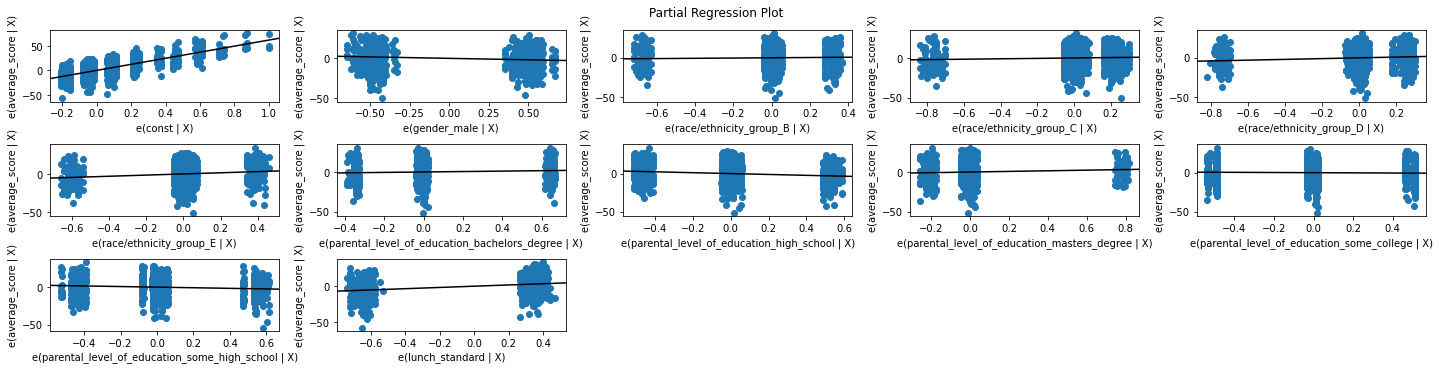

In [ ]:
# plotting the regression results to study patterns
# The grid changed to accomodate more graphs
fig = plt.figure(figsize=(20,8))
sm.graphics.plot_partregress_grid(
    model,
    exog_idx=list(x.columns.values),
    fig=fig,
    grid=(5,5))
plt.tight_layout()
plt.show()